In [1]:
import pandas as pd 
results_df_r=pd.read_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\rabi_n_wheat_cultural_gamma.csv")
results_df_k=pd.read_csv(r"E:\crop_switchning\fig2\code_final_cop\kharif_data\kharif_n_rice_cultural_gamma.csv")

In [14]:
# Combine the datasets by appending
combined_df = pd.concat([results_df_r, results_df_k])
#combined_df = results_df_k


In [15]:
# Drop the 'Unnamed: 0' column as it's not needed for the sum operation
combined_df.drop(columns=['Unnamed: 0'], inplace=True)

# Group by 'Gamma' and sum the other columns
summed_df = combined_df.groupby('Gamma').sum().reset_index()

In [16]:
summed_df['Percentage Change in Nitrogen Surplus']=100*(summed_df['Original Total Nitrogen Surplus']-summed_df['Optimized Total Nitrogen Surplus'])/summed_df['Original Total Nitrogen Surplus']

In [17]:
summed_df

,Gamma,Original Total Nitrogen Surplus,Optimized Total Nitrogen Surplus,Percentage Change in Nitrogen Surplus
0,0.0,5.235455e+09,4.007577e+09,23.453121
1,0.1,5.235455e+09,4.015329e+09,23.305059
2,0.2,5.235455e+09,4.026954e+09,23.083006
3,0.3,5.235455e+09,4.042579e+09,22.784562
4,0.4,5.235455e+09,4.062969e+09,22.395109
5,0.5,5.235455e+09,4.083517e+09,22.002627
6,0.6,5.235455e+09,4.109687e+09,21.502768
7,0.7,5.235455e+09,4.155724e+09,20.623437
8,0.8,5.235455e+09,4.233523e+09,19.137435
9,0.9,5.235455e+09,4.350637e+09,16.900500


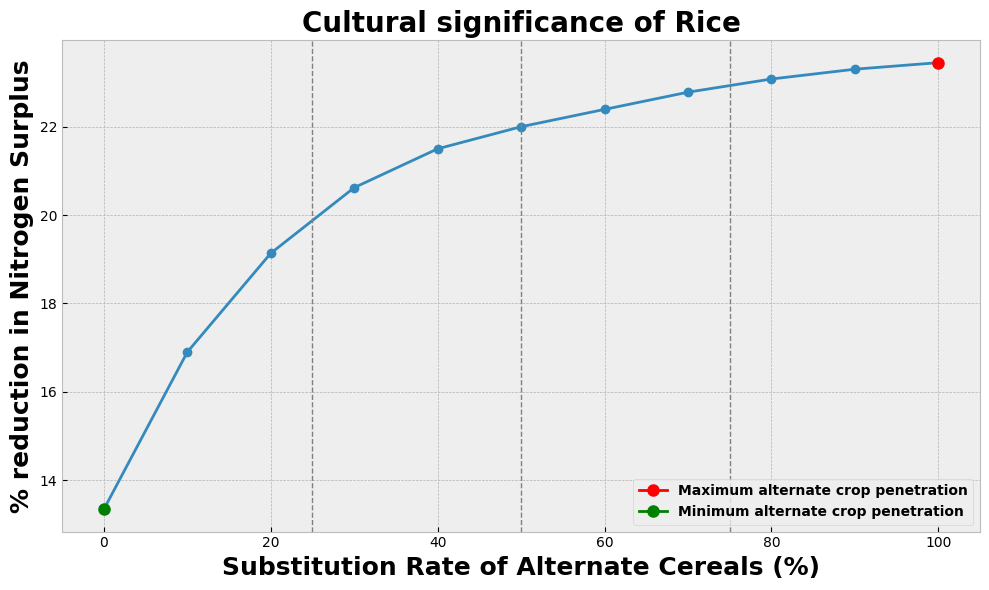

In [20]:
import matplotlib.pyplot as plt
plt.style.use('bmh')
fig, ax = plt.subplots(figsize=(10, 6))
#fig, ax = plt.subplots(figsize=(8, 4))

# Extracting data for plotting
gamma_values = 100 - summed_df['Gamma'] * 100
percentage_changes = summed_df['Percentage Change in Nitrogen Surplus']

# Plotting
plt.plot(gamma_values, percentage_changes, marker='o', linestyle='-')
plt.xlabel('Substitution Rate of Alternate Cereals (%)', fontsize=18, fontweight='bold')
plt.ylabel('% reduction in Nitrogen Surplus', fontsize=18, fontweight='bold')
plt.title('Cultural significance of Rice and Wheat', fontsize=20, fontweight='bold')
plt.grid(True)

# Marking specific points
plt.plot(100, percentage_changes.iloc[0], marker='o', markersize=8, color='red', label='Maximum alternate crop penetration')
plt.plot(0, percentage_changes.iloc[-1], marker='o', markersize=8, color='green', label='Minimum alternate crop penetration')

# Adjust the legend to make text bold
# Adjust the legend size and position
plt.legend(prop={'weight': 'bold'}, loc='lower right', fontsize=12)

# Mark vertical lines at gamma_values = 25, 50, 75
for gamma in [25, 50, 75]:
    plt.axvline(x=gamma, color='gray', linestyle='--', linewidth=1)

# Show legend
#plt.legend()
plt.tight_layout()
#plt.savefig(r'E:\crop_switchning\fig2\code_final_cop\plot\cultural_significance_r_w.png', dpi=600)  # Save the figure as a PNG file with 300 dpi resolution
plt.show()
